# Welcome

In this notebook we explore the performance between Bagging, Boosting with a baseline weak classifier of decision tree.

First we generate a synthetic dataset and comapre the descision boundary generation of each of the technique.

Next we use a real-world dataset which to compare performance in terms of accuracy and prediction.



# Experiment 1: Synthetic dataset

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

## Generate dataset

In [2]:
# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

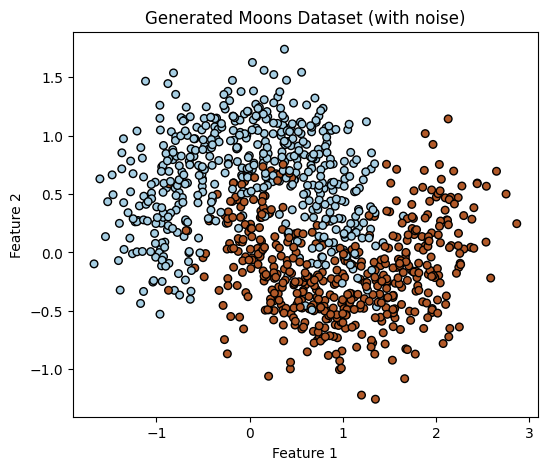

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor="k", s=30)
plt.title("Generated Moons Dataset (with noise)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Define Models

In [4]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=1, random_state=42),
    "Bagging": BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                                 n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                                   n_estimators=50, random_state=42)
}

## Training and evaluation

In [5]:
results = {}

# Train, evaluate, and store results
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": acc, "train_time": train_time, "model": model}

## Visualization

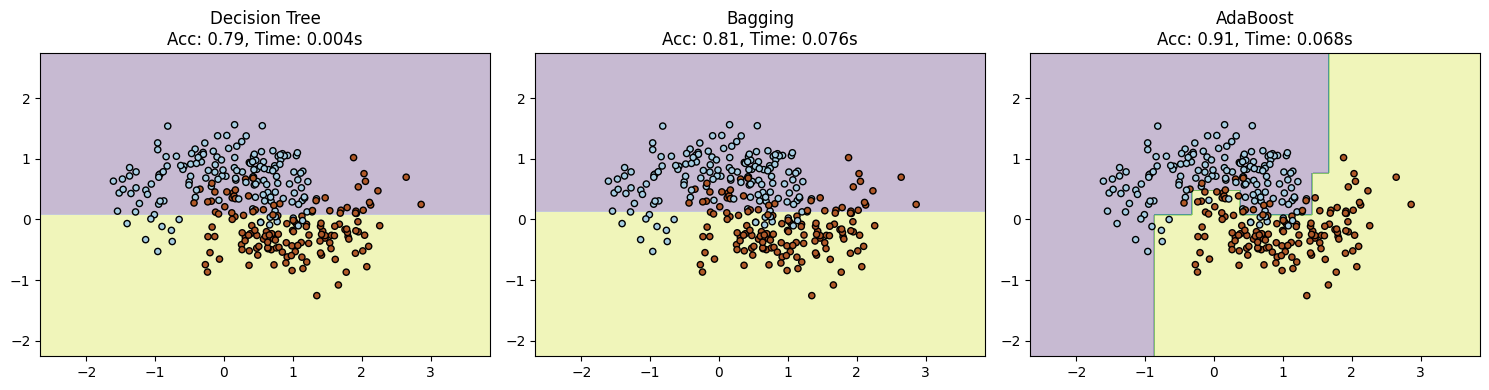

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300))

for ax, (name, res) in zip(axes, results.items()):
    Z = res["model"].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap=plt.cm.Paired)
    ax.set_title(f"{name}\nAcc: {res['accuracy']:.2f}, Time: {res['train_time']:.3f}s")

plt.tight_layout()
plt.show()

# Experiment 2: Breast Cancer dataset

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

## Dataset loading

In [15]:
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target

In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


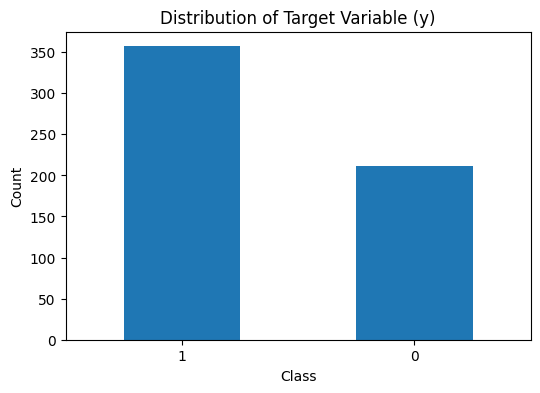

In [19]:
# Count the occurrences of each class in y
class_counts = y.value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [22]:
data = load_breast_cancer()
X, y = data.data, data.target

## Train-test split and Scaling

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define models and evaluate

In [25]:
models_real = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Bagging": BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=42),
                                 n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=42),
                                   n_estimators=50, random_state=42)
}

results_real = {}

# Train and evaluate
for name, model in models_real.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results_real[name] = {"accuracy": acc, "train_time": train_time}

In [28]:
import pandas as pd

df_results_real = pd.DataFrame(results_real).T

# caas_jupyter_tools.display_dataframe_to_user("Real-world Dataset Results (Breast Cancer)", df_results_real)
display(df_results_real)

,accuracy,train_time
Decision Tree,0.923977,0.006090
Bagging,0.923977,0.183604
AdaBoost,0.947368,0.263014


# Summary of Findings

Based on the experiments conducted:

## Experiment 1: Synthetic Dataset

- **Decision Tree (weak learner):** The single decision tree with `max_depth=1` shows a simple linear decision boundary and an accuracy of **0.79**. This demonstrates its limitation in capturing the non-linear structure of the moons dataset.
- **Bagging:** Bagging with 50 such decision trees improves the decision boundary, making it more complex and better fitting the data. The accuracy increases to **0.81**, showing a slight improvement over the single decision tree.
- **AdaBoost:** AdaBoost with 50 decision trees significantly improves the decision boundary, creating a highly non-linear separation that closely follows the shape of the moons. This leads to a much higher accuracy of **0.91**, highlighting the effectiveness of boosting in combining weak learners to form a strong classifier for this type of data.

## Experiment 2: Breast Cancer Dataset

- **Decision Tree:** The decision tree with `max_depth=3` achieves an accuracy of **0.92**.
- **Bagging:** Bagging with 50 decision trees (max_depth=3) also achieves an accuracy of **0.92**, similar to the single decision tree.
- **AdaBoost:** AdaBoost with 50 decision trees (max_depth=3) shows the best performance with an accuracy of **0.95**.

## Conclusion

For the synthetic moons dataset, which is non-linear, both Bagging and AdaBoost significantly outperform the single decision tree, with AdaBoost showing superior performance due to its adaptive weighting of misclassified samples.

For the real-world breast cancer dataset, all three models perform relatively well. AdaBoost still achieves the highest accuracy, demonstrating its potential even on more complex, real-world data. Bagging in this case shows similar performance to the single decision tree, suggesting that with a slightly deeper base learner (`max_depth=3` compared to `max_depth=1`), the benefits of bagging might be less pronounced than with very weak learners.

Overall, this experiment illustrates how ensemble methods, particularly AdaBoost, can improve the performance of weak learners by combining them effectively.